In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib

In [10]:
import numpy as np
import pandas as pd

In [11]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables (into classes)
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [18]:
#list of table names
inspector = inspect(engine)
inspector.get_table_names()



['measurement', 'station']

In [19]:
#list of column types
columns = inspector.get_columns('measurement')

for c in columns:
    print(c['name'], c['type'])
#id int, station text, date text, pcrp float, tobs float

#select/display first 10 rows from the Measurement Table. NOt necessary.
engine.execute('SELECT * FROM Measurement LIMIT 30').fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [21]:
# Calculate the date 1 year ago from the last data point in the database
#what is latest date available?
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# 2017-08-23

#date one year ago from lasted date available in data
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)
# 2016-08-23

# Perform a query to retrieve the data and precipitation scores

#last 12 month of precipitation data
last_12_mo_prcp = (session
               .query(Measurement.prcp)
               .filter(Measurement.date > year_ago)
               .order_by(Measurement.date).all())
#last_12_mo_prcp
for row in last_12_mo_prcp:
    print(row)


#dates for the last 12 months of measurements.
last_12_mo_date = (session
                   .query(Measurement.date)
                   .filter(Measurement.date > year_ago)
                   .order_by(Measurement.date).all())

#combine both queries--last 12 months of measurement dates and precipitation
last_12_date_prcp = (session
                   .query(Measurement.date, Measurement.prcp)
                   .filter(Measurement.date >= year_ago)
                   .order_by(Measurement.date).all())
 

#print(last_12_mo_date)
for row in last_12_mo_date:
    print(row)

2016-08-23 00:00:00
(0.08,)
(2.15,)
(2.28,)
(None,)
(1.22,)
(2.15,)
(1.45,)
(0.08,)
(0.08,)
(0.0,)
(0.0,)
(0.21,)
(0.06,)
(0.11,)
(0.0,)
(0.03,)
(0.02,)
(0.04,)
(0.0,)
(0.01,)
(0.0,)
(0.18,)
(0.02,)
(0.0,)
(0.12,)
(None,)
(0.01,)
(0.14,)
(0.14,)
(0.14,)
(0.6,)
(2.07,)
(0.0,)
(0.17,)
(0.04,)
(None,)
(0.0,)
(0.35,)
(0.9,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.0,)
(0.05,)
(0.13,)
(0.1,)
(None,)
(None,)
(0.25,)
(0.24,)
(2.46,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.02,)
(0.01,)
(0.0,)
(0.02,)
(0.19,)
(None,)
(None,)
(0.01,)
(0.03,)
(0.0,)
(0.07,)
(0.08,)
(0.12,)
(1.0,)
(0.03,)
(0.03,)
(0.74,)
(0.14,)
(0.44,)
(None,)
(0.11,)
(None,)
(0.02,)
(0.03,)
(0.18,)
(None,)
(0.05,)
(0.04,)
(0.03,)
(0.11,)
(1.0,)
(0.05,)
(0.1,)
(0.23,)
(0.11,)
(0.16,)
(1.35,)
(0.0,)
(0.22,)
(0.01,)
(None,)
(0.01,)
(0.07,)
(0.15,)
(0.03,)
(0.01,)
(0.29,)
(None,)
(0.23,)
(0.16,)
(0.35,)
(0.0,)
(0.01,)
(0.14,)
(0.09,)
(1.16,)
(0.05,)
(0.18,)
(0.12,)
(0.3,)
(0.6,)
(0.0,)
(0.04,)
(None,)
(None,)
(0.15,)
(0.31,)
(1.04,)
(0.02,)
(0.37,)


(0.0,)
(0.07,)
(0.1,)
(0.05,)
(0.25,)
(0.18,)
(0.0,)
(0.24,)
(0.7,)
(0.0,)
(0.05,)
(0.19,)
(None,)
(0.01,)
(0.08,)
(0.4,)
(0.02,)
(0.05,)
(0.17,)
(None,)
(0.0,)
(0.31,)
(0.0,)
(0.02,)
(None,)
(None,)
(0.19,)
(0.3,)
(0.0,)
(0.1,)
(0.0,)
(0.0,)
(0.06,)
(0.28,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.05,)
(0.12,)
(0.5,)
(0.06,)
(0.0,)
(0.0,)
(0.36,)
(0.22,)
(0.0,)
(0.08,)
(0.0,)
(0.02,)
(0.5,)
(0.0,)
(0.02,)
(None,)
(None,)
(0.0,)
(0.06,)
(0.02,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(0.01,)
(0.1,)
(0.0,)
(0.01,)
(0.0,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.03,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.04,)
(0.08,)
(0.04,)
(0.0,)
(0.12,)
(0.07,)
(0.01,)
(0.2,)
(0.02,)
(0.06,)
(0.08,)
(0.1,)
(0.02,)
(0.05,)
(None,)
(0.15,)
(0.5,)
(0.04,)
(0.13,)
(None,)
(None,)
(0.02,)
(0.15,)
(0.4,)
(0.04,)
(0.03,)
(0.08,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(None,)
(None,)
(0.0,)
(0.0,)
(0.0,)
(0.0,)
(None,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.02,)
(None,)
(None,)
(0.0,)
(0.18,)
(0.3,)
(0.0,)
(0.02,)
(0.06,)
(0.0,)
(0.0,)
(0.02,)
(0.0,)
(0.09,)
(0

('2017-03-27',)
('2017-03-28',)
('2017-03-28',)
('2017-03-28',)
('2017-03-28',)
('2017-03-28',)
('2017-03-28',)
('2017-03-28',)
('2017-03-29',)
('2017-03-29',)
('2017-03-29',)
('2017-03-29',)
('2017-03-29',)
('2017-03-29',)
('2017-03-29',)
('2017-03-30',)
('2017-03-30',)
('2017-03-30',)
('2017-03-30',)
('2017-03-30',)
('2017-03-30',)
('2017-03-31',)
('2017-03-31',)
('2017-03-31',)
('2017-03-31',)
('2017-03-31',)
('2017-03-31',)
('2017-03-31',)
('2017-04-01',)
('2017-04-01',)
('2017-04-01',)
('2017-04-01',)
('2017-04-01',)
('2017-04-01',)
('2017-04-02',)
('2017-04-02',)
('2017-04-02',)
('2017-04-02',)
('2017-04-02',)
('2017-04-02',)
('2017-04-03',)
('2017-04-03',)
('2017-04-03',)
('2017-04-03',)
('2017-04-03',)
('2017-04-03',)
('2017-04-03',)
('2017-04-04',)
('2017-04-04',)
('2017-04-04',)
('2017-04-04',)
('2017-04-04',)
('2017-04-04',)
('2017-04-04',)
('2017-04-05',)
('2017-04-05',)
('2017-04-05',)
('2017-04-05',)
('2017-04-05',)
('2017-04-05',)
('2017-04-05',)
('2017-04-06',)
('2017-0

<function matplotlib.pyplot.show(*args, **kw)>

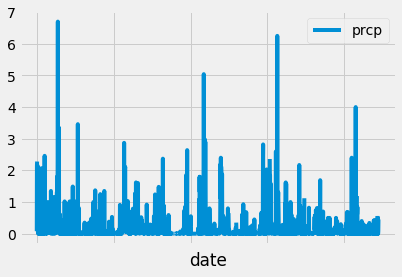

In [22]:
# Save the query results as a Pandas DataFrame 
#df = pd.DataFrame(last_12_date_prcp, columns=['prcp'], ['date'])
df = pd.DataFrame(last_12_date_prcp)
#set DF index to the date column
df.set_index(df['date'], inplace=True)

# DF is now already sorted by date. SO, no need to change anything????
df.plot()
plt.show

![precipitation](Images/precipitation.png)

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [24]:
# Design a query to show how many stations are available in this dataset?

In [25]:
#list of column types
columns = inspector.get_columns('station')

for c in columns:
    print(c['name'], c['type'])

num_stations = (session
               .query(Station.station)
               .order_by(Station.station).count())
num_stations
#9 stations available in dataset

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


9

In [26]:
active_stations = (session
                  .query(func.count(Measurement.station), Measurement.station)
                   
                  .group_by(Measurement.station))

for totals in active_stations :
    print(totals)

(1979, 'USC00511918')
(2709, 'USC00513117')
(2202, 'USC00514830')
(2612, 'USC00516128')
(1372, 'USC00517948')
(511, 'USC00518838')
(2772, 'USC00519281')
(2724, 'USC00519397')
(2669, 'USC00519523')


In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = (session
                   .query(func.count(Measurement.station), Measurement.station)
                   .group_by(Measurement.station)
                   .order_by(func.count(Measurement.station).desc()))

for totals in active_stations:
    print(totals)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lo_hi_avg = (session
              .query(func.min(Measurement.tobs),  func.max(Measurement.tobs), func.avg(Measurement.tobs), Measurement.station)
                .group_by(Measurement.station)
               )
for temps in lo_hi_avg:
    print(temps)

(53.0, 87.0, 71.61596766043456, 'USC00511918')
(59.0, 85.0, 72.68918420081211, 'USC00513117')
(58.0, 85.0, 74.8732970027248, 'USC00514830')
(58.0, 84.0, 70.91500765696784, 'USC00516128')
(58.0, 87.0, 74.68440233236151, 'USC00517948')
(58.0, 83.0, 72.72407045009784, 'USC00518838')
(54.0, 85.0, 71.66378066378067, 'USC00519281')
(56.0, 87.0, 74.55323054331865, 'USC00519397')
(56.0, 85.0, 74.5436493068565, 'USC00519523')


(77.0, '2016-08-24')
(80.0, '2016-08-25')
(80.0, '2016-08-26')
(75.0, '2016-08-27')
(73.0, '2016-08-28')
(78.0, '2016-08-29')
(77.0, '2016-08-30')
(78.0, '2016-08-31')
(80.0, '2016-09-01')
(80.0, '2016-09-02')
(78.0, '2016-09-03')
(78.0, '2016-09-04')
(78.0, '2016-09-05')
(73.0, '2016-09-06')
(74.0, '2016-09-07')
(80.0, '2016-09-08')
(79.0, '2016-09-09')
(77.0, '2016-09-10')
(80.0, '2016-09-11')
(76.0, '2016-09-12')
(79.0, '2016-09-13')
(75.0, '2016-09-14')
(79.0, '2016-09-15')
(78.0, '2016-09-16')
(79.0, '2016-09-17')
(78.0, '2016-09-18')
(78.0, '2016-09-19')
(76.0, '2016-09-20')
(74.0, '2016-09-21')
(77.0, '2016-09-22')
(78.0, '2016-09-23')
(79.0, '2016-09-24')
(79.0, '2016-09-25')
(77.0, '2016-09-26')
(80.0, '2016-09-27')
(78.0, '2016-09-28')
(78.0, '2016-09-29')
(78.0, '2016-09-30')
(77.0, '2016-10-01')
(79.0, '2016-10-02')
(79.0, '2016-10-03')
(79.0, '2016-10-04')
(79.0, '2016-10-05')
(75.0, '2016-10-06')
(76.0, '2016-10-07')
(73.0, '2016-10-08')
(72.0, '2016-10-09')
(71.0, '2016-

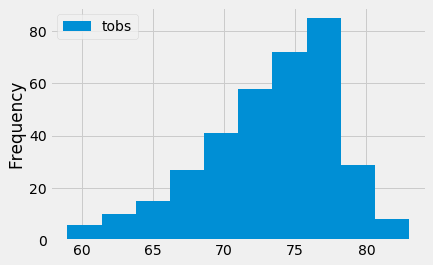

In [29]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Station USC00519281 has highest number of temperature observations (2772)
#last 12 months' temperature data for top station
top_station_data = (session
                    .query(Measurement.tobs, Measurement.date)
                    .filter(Measurement.date >= year_ago)
                    .filter(Measurement.station == 'USC00519281')
                    )
for td in top_station_data:
    print(td)
    
#plot last 12 months temp data of top station
top_df = pd.read_sql(top_station_data.statement, top_station_data.session.bind)
top_df


top_df.plot.hist()
plt.show()

![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
